## Create atom data files

#### Download Database

1.  NIST atomic_weights

In [9]:
# Disable SSL verification for NIST datasets
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from carsus.io.nist import NISTWeightsComp, NISTIonizationEnergies

 ChiantiPy version 0.8.4 
 found PyQt5 widgets
 using PyQt5 widgets


In [6]:
atomic_weights = NISTWeightsComp()

[ carsus.io.nist.weightscomp][   INFO] - Downloading data from the NIST Atomic Weights and Isotopic Compositions Database. (weightscomp.py:49)


2.  NIST ionization_energies

In [20]:
ionization_energies = NISTIonizationEnergies('H-Zn')

[  carsus.io.nist.ionization][   INFO] - Downloading ionization energies from the NIST Atomic Spectra Database. (ionization.py:64)


3. GFALL

In [10]:
!wget -qO /tmp/gfall.dat https://media.githubusercontent.com/media/tardis-sn/carsus-db/master/gfall/gfall_latest.dat

In [14]:
from carsus.io.kurucz import GFALLReader

gfall_reader = GFALLReader('H-Zn',
                           '/tmp/gfall.dat')

[     carsus.io.kurucz.gfall][WARNING] - A specific combination to identify unique levels from GFALL data has not been given. Defaulting to ["energy", "j"]. (gfall.py:93)


4. ZETA

In [21]:
from carsus.io.zeta import KnoxLongZeta

zeta_data = KnoxLongZeta()

5. CMFGEN

In [16]:
from carsus.io.cmfgen import CMFGENReader

cmfgen_reader = CMFGENReader.from_config('Si 0-1',
                                         '/tmp/atomic',
                                         priority=30,
                                         ionization_energies=True,
                                         cross_sections=True,
                                         collisions=False,
                                         temperature_grid=None,
                                         drop_mismatched_labels=True)

[      carsus.io.cmfgen.base][WARNING] - Selecting H 0 from CMFGEN (required to ingest cross-sections). (base.py:543)
[      carsus.io.cmfgen.base][   INFO] - Configuration schema found for H 0. (base.py:557)
[      carsus.io.cmfgen.base][   INFO] - Configuration schema found for Si 0. (base.py:557)
[      carsus.io.cmfgen.base][   INFO] - Configuration schema found for Si 1. (base.py:557)
[      carsus.io.cmfgen.base][   INFO] - Loading atomic data for H 0. (base.py:820)
[      carsus.io.cmfgen.base][   INFO] - Loading atomic data for Si 0. (base.py:820)
[      carsus.io.cmfgen.base][   INFO] - Loading atomic data for Si 1. (base.py:820)


6. CHIANTI

In [22]:
!printenv XUVTOP

/home/ayushi23/carsus_data_files/chianti/root/carsus_data_4/


In [23]:
from carsus.io.chianti_ import ChiantiReader

chianti_reader = ChiantiReader('H-He',
                               collisions=True,
                               priority=20)

### create atom data files using TARDISAtomData

In [24]:
from carsus.io.output import TARDISAtomData

atom_data = TARDISAtomData(atomic_weights,
                           ionization_energies,
                           gfall_reader,
                           zeta_data,
                           chianti_reader)

[      carsus.io.output.base][   INFO] - Ingesting energy levels. (base.py:327)
[     carsus.io.kurucz.gfall][   INFO] - Parsing GFALL from: /tmp/gfall.dat (gfall.py:146)
[      carsus.io.output.base][   INFO] - GFALL selected species: Li 0, Li 1, Be 0, Be 1, Be 2, B 0, B 1, B 2, B 3, C 0, C 1, C 2, C 3, N 0, N 1, N 2, N 3, N 4, N 5, O 0, O 1, O 2, O 3, O 4, O 5, F 0, F 1, F 2, F 3, F 4, F 5, Ne 0, Ne 1, Ne 2, Ne 3, Ne 4, Ne 5, Na 0, Na 1, Na 2, Na 3, Na 4, Na 5, Mg 0, Mg 1, Mg 2, Mg 3, Mg 4, Mg 5, Al 0, Al 1, Al 2, Al 3, Al 4, Al 5, Si 0, Si 1, Si 2, Si 3, Si 4, Si 5, P 0, P 1, P 2, P 3, P 4, P 5, S 0, S 1, S 2, S 3, S 4, S 5, Cl 0, Cl 1, Cl 2, Cl 3, Cl 4, Ar 0, Ar 1, Ar 2, Ar 3, Ar 4, K 0, K 1, K 2, K 3, K 4, Ca 0, Ca 1, Ca 2, Ca 3, Ca 4, Ca 5, Ca 6, Ca 7, Ca 8, Sc 0, Sc 1, Sc 2, Sc 3, Sc 4, Sc 5, Sc 6, Sc 7, Sc 8, Ti 0, Ti 1, Ti 2, Ti 3, Ti 4, Ti 5, Ti 6, Ti 7, Ti 8, V 0, V 1, V 2, V 3, V 4, V 5, V 6, V 7, V 8, Cr 0, Cr 1, Cr 2, Cr 3, Cr 4, Cr 5, Cr 6, Cr 7, Cr 8, Mn 0, Mn 1, Mn 2, 

#### Save as HDF files

In [25]:
atom_data.to_hdf('atom2_data_file')

[                py.warnings][WARNING] - /home/ayushi23/miniconda3/envs/carsus/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->values] [items->None]

  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:110)
[                py.warnings][WARNING] - /home/ayushi23/miniconda3/envs/carsus/lib/python3.7/site-packages/pyarrow/serialization.py:165: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(obj, pd.SparseDataFrame):
 (warnings.py:110)
[                py.warnings][WARNING] - /home/ayushi23/miniconda3/envs/carsus/lib/python3.7/site-packages/pyarrow/serialization.py:176: FutureWarning: The SparseSeries class is removed from pandas. Accessing it from the top-level namespace will also be removed 

### Inspect data files

In [33]:
import pandas as pd
store1 = pd.HDFStore('atom1_data_file', key='metadata')
store1["metadata"]

value
field    key                                                    
format   version                                             1.0
md5sum   atom_data              634785f05c4868f929c85c02828d4ef8
         collisions_data        99a12d9dfddbff1863ca68007a4f3e66
         collisions_metadata    2139b8beb1db60823290c24aa0d5a464
         ionization_data        9f1209ed50d9ed395979081e92ddcb87
         levels_data            abc6189be81931f536ce59bede7f9db8
         lines_data             1e41f474da043df6e713fedc48664dbb
         lines_metadata         736d8321848fa598443cbd807732a8dc
         macro_atom_data        6dd03d9bdff8804ec101d618eb71169a
         macro_atom_references  618a88c290f22e3d61aa6186b726aba1
         zeta_data              f2496cec5c219dfb6d637df8e92fd3f0
datasets nist_weights                                        4.1
         nist_spectra                                       5.10
         gfall                  2704fbda0b8cba61bb70426234224464
         zeta                   a1d4bed2982e8d6a4f8b0076bf637e49
         chianti                                           9.0.1
software python                                           3.7.12
         carsus                              0.1.dev691+g7114302
         astropy                                           3.2.3
         numpy                                            1.15.4
         pandas                                            1.0.5
         pyarrow                                          0.14.1
         tables                                            3.6.1
         ChiantiPy                                         0.8.4

In [59]:
store2 = pd.HDFStore('atom2_data_file', key='metadata')
store2["metadata"]

value
field    key                                                    
format   version                                             1.0
md5sum   atom_data              634785f05c4868f929c85c02828d4ef8
         collisions_data        99a12d9dfddbff1863ca68007a4f3e66
         collisions_metadata    2139b8beb1db60823290c24aa0d5a464
         ionization_data        9f1209ed50d9ed395979081e92ddcb87
         levels_data            abc6189be81931f536ce59bede7f9db8
         lines_data             1e41f474da043df6e713fedc48664dbb
         lines_metadata         736d8321848fa598443cbd807732a8dc
         macro_atom_data        6dd03d9bdff8804ec101d618eb71169a
         macro_atom_references  618a88c290f22e3d61aa6186b726aba1
         zeta_data              f2496cec5c219dfb6d637df8e92fd3f0
datasets nist_weights                                        4.1
         nist_spectra                                       5.10
         gfall                  2704fbda0b8cba61bb70426234224464
         zeta                   a1d4bed2982e8d6a4f8b0076bf637e49
         chianti                                          10.0.1
software python                                           3.7.12
         carsus                              0.1.dev691+g7114302
         astropy                                           3.2.3
         numpy                                            1.15.4
         pandas                                            1.0.5
         pyarrow                                          0.14.1
         tables                                            3.6.1
         ChiantiPy                                         0.8.4

In [70]:
store1['lines_data'].head()

line_id  \
atomic_number ion_number level_number_lower level_number_upper            
3             0          22                 66                     1824   
                         29                 66                     1925   
                         37                 66                     2000   
                         38                 66                     2002   
                         44                 66                     2050   

                                                                  wavelength  \
atomic_number ion_number level_number_lower level_number_upper                 
3             0          22                 66                  16404.816436   
                         29                 66                  27592.029652   
                         37                 66                  43823.900517   
                         38                 66                  43823.973537   
                         44                 66                  67909.408678   

                                                                    f_ul  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          22                 66                  0.000458   
                         29                 66                  0.001227   
                         37                 66                  0.000276   
                         38                 66                  0.002517   
                         44                 66                  0.000619   

                                                                    f_lu  \
atomic_number ion_number level_number_lower level_number_upper             
3             0          22                 66                  0.000305   
                         29                 66                  0.000818   
                         37                 66                  0.000276   
                         38                 66                  0.001678   
                         44                 66                  0.000619   

                                                                          nu  \
atomic_number ion_number level_number_lower level_number_upper                 
3             0          22                 66                  1.827466e+14   
                         29                 66                  1.086518e+14   
                         37                 66                  6.840844e+13   
                         38                 66                  6.840832e+13   
                         44                 66                  4.414594e+13   

                                                                        B_lu  \
atomic_number ion_number level_number_lower level_number_upper                 
3             0          22                 66                  8.411155e+07   
                         29                 66                  3.790250e+08   
                         37                 66                  2.030891e+08   
                         38                 66                  1.234798e+09   
                         44                 66                  7.061638e+08   

                                                                        B_ul  \
atomic_number ion_number level_number_lower level_number_upper                 
3             0          22                 66                  1.261673e+08   
                         29                 66                  5.685376e+08   
                         37                 66                  2.030891e+08   
                         38                 66                  1.852197e+09   
                         44                 66                  7.061638e+08   

                                                                        A_ul  
atomic_number ion_number level_number_lower level_number_upper                
3             0          22                 66                  11353.

# Compare atom data files generated

Atom data files with chianti version 9.0.1 and 10.0.1 are compared here

In [36]:
from carsus.io import AtomDataCompare

In [37]:
ATOM1_PATH="atom1_data_file"
ATOM2_PATH="atom2_data_file"

In [38]:
atc = AtomDataCompare(ATOM1_PATH, ATOM2_PATH)

In [39]:
atc.compare()

,exists_1,exists_2,match
atom_data,True,True,True
collisions,True,True,True
collisions_metadata,True,True,True
ionization_data,True,True,True
levels,True,True,True
lines,True,True,True
lines_metadata,True,True,True
macro_atom_data,True,True,True
macro_atom_references,True,True,True
metadata,True,True,False


#### ion_diff to investigate specific ions for lines and levels

In [42]:
atc.ion_diff("levels",(3,0))

All the values in both the dataframes match.


In [50]:
atc.ion_diff("lines",(1,0))

All the values in both the dataframes match.


In [51]:
atc.ion_diff("lines",(1,0), simplify_output=False)

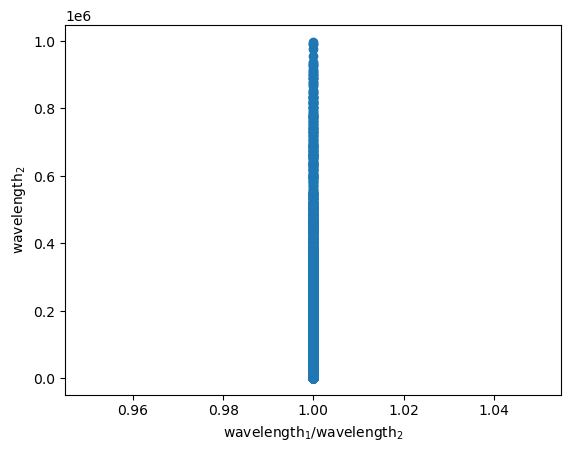

In [54]:
atc.plot_ion_diff(key_name="lines", ion="Fe", column="wavelength")

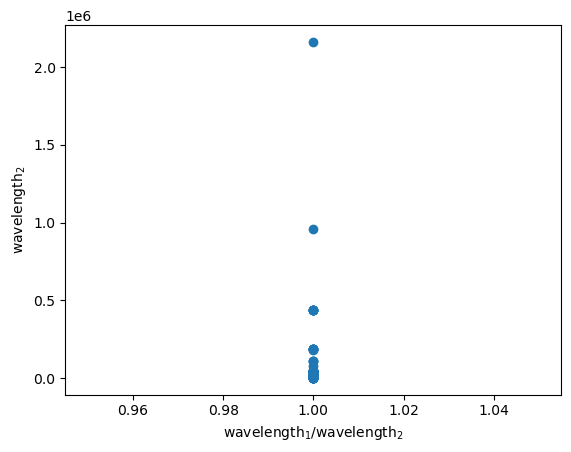

In [55]:
atc.plot_ion_diff(key_name="lines", ion="He", column="wavelength")

#### Using key_diff to compare specific fields in both dataframes

In [57]:
atc.key_diff("levels")

,,total_rows,not_matches_energy,not_matches_g,not_matches_metastable
atomic_number,ion_number,,,,


In [56]:
atc.key_diff("lines")

#### Access dataframes as attributes

In [74]:
atc.d1_df

,file_keys,exists
atom_data,atom_data,True
collisions,collisions_data,True
collisions_metadata,collisions_metadata,True
ionization_data,ionization_data,True
levels,levels_data,True
lines,lines_data,True
lines_metadata,lines_metadata,True
macro_atom_data,macro_atom_data,True
macro_atom_references,macro_atom_references,True
metadata,metadata,True


In [75]:
atc.levels_columns

Index(['energy', 'g', 'metastable'], dtype='object')

In [76]:
atc.lines_columns

Index(['line_id', 'wavelength', 'f_ul', 'f_lu', 'nu', 'B_lu', 'B_ul', 'A_ul'], dtype='object')

#### To close open HDF files

In [77]:
atc.teardown()